In [1]:
# Importação dos módulos para a construção das árvores filogenéticas
from Bio.SeqRecord import SeqRecord
from Bio.Align import MultipleSeqAlignment, AlignInfo
from Bio import AlignIO, Phylo
from Bio import SeqIO
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor

In [2]:
# Para tal foi realizado a leitura do documento fasta obtido no Blastp e determinado 7 sequências
record = SeqIO.parse(open("blastp_ptsp.fasta"), format = 'fasta')
lista_seqs = [c.seq for c in record]
seq1 = lista_seqs[0]
seq2 = lista_seqs[1]
seq3 = lista_seqs[2]
seq4 = lista_seqs[3]
seq5 = lista_seqs[4]
seq6 = lista_seqs[5]
seq7 = lista_seqs[6]

# Definição do nome
seqr_1 = SeqRecord(seq1, id='Faecalibacterium')
seqr_2 = SeqRecord(seq2, id='Faecalibacterium')
seqr_3 = SeqRecord(seq3, id='Faecalibacterium')
seqr_4 = SeqRecord(seq4, id='Faecalibacterium')
seqr_5 = SeqRecord(seq5, id='Faecalibacterium')
seqr_6 = SeqRecord(seq5, id='Faecalibacterium')
seqr_7 = SeqRecord(seq5, id='Faecalibacterium')

# Uso do MultipleSeqAlignment para formular o alinhamento
alin= MultipleSeqAlignment([seqr_1,seqr_2,seqr_3,seqr_4, seqr_5,seqr_6, seqr_7])

In [3]:
# Criação do documento com o resultado do alinhamento
save_file = open('my_alignment_ptsp.fasta', "w")
save_file.write(format(alin, 'fasta'))
save_file.close()

In [4]:
# Leitura do documento e visualização do alinhamento
alignment = open('my_alignment_ptsp.fasta')
alignment_records = AlignIO.parse(alignment, 'fasta')
for record in alignment_records:
    print(record)

Alignment with 7 rows and 547 columns
MQVGTGKSVLNGIAIGKLKIYKKKDTAISTAPVADTAAELERFE...EKA Faecalibacterium
MQVGTGKSVLNGIAIGKLKIYKKKDTAISTAPVADTAAELERFE...EKA Faecalibacterium
MQVGTGKSVLNGIAIGKLKIYKKKDTAISTAPVADTAAELERFE...EKA Faecalibacterium
MQVGTGKSVLNGIAIGKLKIYKKKDTAISTAPVADTAAELERFE...EKA Faecalibacterium
MQVGTGKSVLNGIAIGKLKIYKKKDTAISTAPVADTAAELERFE...EKA Faecalibacterium
MQVGTGKSVLNGIAIGKLKIYKKKDTAISTAPVADTAAELERFE...EKA Faecalibacterium
MQVGTGKSVLNGIAIGKLKIYKKKDTAISTAPVADTAAELERFE...EKA Faecalibacterium


In [8]:
from Bio import AlignIO

# Substitua "alignment.fasta" pelo caminho do seu arquivo
msa = AlignIO.read("my_alignment_ptsp.fasta", "fasta")


In [9]:
# Verifique e renomeie IDs duplicados no MSA
unique_ids = set()
for i, record in enumerate(msa):  # `msa` é o objeto MultipleSeqAlignment
    if record.id in unique_ids:
        print(f"ID duplicado encontrado: {record.id}. Renomeando...")
        record.id = f"{record.id}_{i}"
    unique_ids.add(record.id)


ID duplicado encontrado: Faecalibacterium. Renomeando...
ID duplicado encontrado: Faecalibacterium. Renomeando...
ID duplicado encontrado: Faecalibacterium. Renomeando...
ID duplicado encontrado: Faecalibacterium. Renomeando...
ID duplicado encontrado: Faecalibacterium. Renomeando...
ID duplicado encontrado: Faecalibacterium. Renomeando...


In [12]:
from Bio import SeqIO

# Corrigir IDs duplicados em um arquivo FASTA
input_file = "my_alignment_ptsp.fasta"
output_file = "sequences_unique.fasta"

unique_ids = set()
with open(output_file, "w") as output_handle:
    for i, record in enumerate(SeqIO.parse(input_file, "fasta")):
        if record.id in unique_ids:
            record.id = f"{record.id}_{i}"  # Renomear duplicados
        unique_ids.add(record.id)
        SeqIO.write(record, output_handle, "fasta")


In [13]:
# Verificar IDs duplicados no alinhamento múltiplo
from collections import Counter

id_counts = Counter(record.id for record in msa)
duplicates = [id_ for id_, count in id_counts.items() if count > 1]
if duplicates:
    print(f"IDs duplicados detectados: {duplicates}")
    raise ValueError("Por favor, corrija os IDs duplicados antes de continuar.")


In [14]:
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceMatrix

# Use a matriz de distância depois de corrigir IDs duplicados
calculator = DistanceCalculator('blosum62')
dm = calculator.get_distance(msa)
print(f"Distance Matrix:\n{dm}")


Distance Matrix:
Faecalibacterium    0.000000
Faecalibacterium_1  0.001080    0.000000
Faecalibacterium_2  0.001080    0.002159    0.000000
Faecalibacterium_3  0.001439    0.002519    0.002519    0.000000
Faecalibacterium_4  0.002157    0.003236    0.003236    0.003596    0.000000
Faecalibacterium_5  0.002157    0.003236    0.003236    0.003596    0.000000    0.000000
Faecalibacterium_6  0.002157    0.003236    0.003236    0.003596    0.000000    0.000000    0.000000
    Faecalibacterium    Faecalibacterium_1  Faecalibacterium_2  Faecalibacterium_3  Faecalibacterium_4  Faecalibacterium_5  Faecalibacterium_6


In [15]:
# Importa a classe DistanceTreeConstructor do módulo TreeConstruction da biblioteca Biopython
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor

# Cria uma instância da classe DistanceTreeConstructor para construir árvores filogenéticas
pylo_STAT6 = DistanceTreeConstructor()

# Gera uma árvore UPGMA usando a matriz de distâncias 'dm'
upgma_tree = pylo_STAT6.upgma(dm)
# Imprime a árvore UPGMA gerada
print(f'UPGMA tree: \n {upgma_tree} \n #########################')

# Gera uma árvore Neighbor Joining usando a matriz de distâncias 'dm'
nj_tree = pylo_STAT6.nj(dm)
# Imprime a árvore Neighbor Joining gerada
print(f'Neighbor Joining tree: \n {nj_tree}')

# Escreve a árvore UPGMA em um arquivo no formato Newick
Phylo.write(upgma_tree, 'upgma_tree.nwk', 'newick')
# Escreve a árvore Neighbor Joining em um arquivo no formato Newick
Phylo.write(nj_tree, 'nj_tree.nwk', 'newick')

UPGMA tree: 
 Tree(rooted=True)
    Clade(branch_length=0, name='Inner6')
        Clade(branch_length=0.001640596907587187, name='Inner2')
            Clade(branch_length=0.0, name='Inner1')
                Clade(branch_length=0.0, name='Faecalibacterium_6')
                Clade(branch_length=0.0, name='Faecalibacterium_5')
            Clade(branch_length=0.0, name='Faecalibacterium_4')
        Clade(branch_length=0.0005160916898829873, name='Inner5')
            Clade(branch_length=0.0011245052177041998, name='Faecalibacterium_3')
            Clade(branch_length=0.0003148614609571748, name='Inner4')
                Clade(branch_length=0.0008096437567470249, name='Faecalibacterium_1')
                Clade(branch_length=0.0002698812522490268, name='Inner3')
                    Clade(branch_length=0.0005397625044979981, name='Faecalibacterium_2')
                    Clade(branch_length=0.0005397625044979981, name='Faecalibacterium') 
 #########################
Neighbor Joining tree: 
 

1

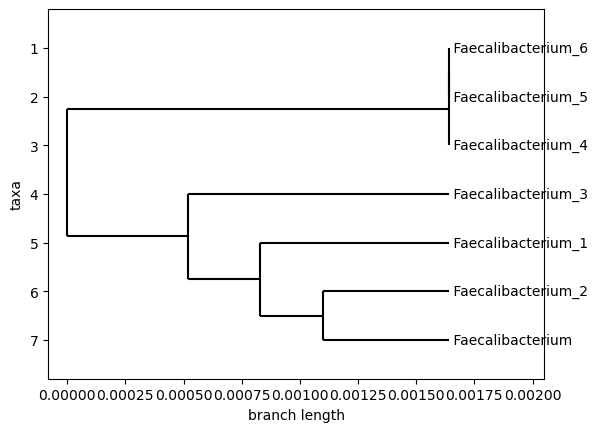

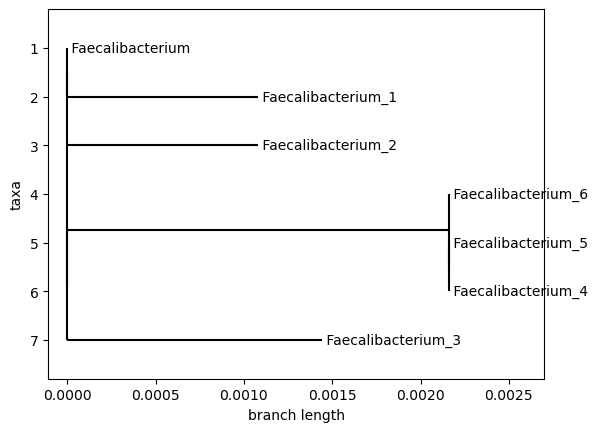

In [16]:
# Leia as árvores
upgmatree = Phylo.read('upgma_tree.nwk', 'newick')
njtree = Phylo.read('nj_tree.nwk', 'newick')

# Remove os rótulos 'Inner' dos clados
for clade in upgmatree.find_clades():
    if 'Inner' in clade.name:
        clade.name = ""
for clade in njtree.find_clades():
    if 'Inner' in clade.name:
        clade.name = ""

# Encontra e destaca o clado com o gênero "Homo" na árvore UPGMA
for clade in upgmatree.find_clades():
    if 'Homo' in clade.name:
        clade.color = 'orange'
        clade.name = '*** ' + clade.name + ' ***'  # Marca o clado

# Encontra e destaca o clado com o gênero "Homo" na árvore NJ
for clade in njtree.find_clades():
    if 'Homo' in clade.name:
        clade.color = 'orange' 
        clade.name = '*** ' + clade.name + ' ***'  # Marca o clado

# Desenha as árvores
Phylo.draw(upgmatree)
Phylo.draw(njtree)